![imagen](./img/ejercicios.png)

# INFORMACIÓN DEL PROYECTO

### TÍTULO

### Generacion Eléctrica Global

### TEMA

### HIPÓTESIS

Voy a hacer un estudio por potencias de todas las centrales eléctricas del mundo. En las tablas está especificado el combustible que utilizan (gas, nuclear,carbon...), latitud,longitud...etc 
He sumado las potencia de cada pais. De modo que el estudio se basa en la potencai total que genera cada país, para hacer un ranking. 
Tengo pensado hacer un gráfico detallado de España en particular con su mapa y uno general a nivel mundial. Y podríamos añadir un grafico de barras de los 5 primeros paises generadores detallando el cobustible que utilizan, para que se vea claramente el nombre del pais debajo y arriba cada pais con 3 o 4 barras q espeficique el porcentaje de combustible renovable sobre el total generado. Por ejemplo: EEUU: 45% gas, 25% carbon, 20% nuclear, 10% renovables. Así con los 5 primeros paises del mundo.

## OBTENCIÓN DE LOS DATOS

he usado la web **World Resources Institute**. El conjunto de plataformas de datos de WRI está a la vanguardia de nuestro trabajo de datos. Estas plataformas permiten a los usuarios monitorear los cambios en los bosques casi en tiempo real, rastrear los impulsores del cambio climático, analizar los riesgos del agua en todo el mundo, examinar la sección transversal de los problemas ambientales globales y más.

Los datos son sacados de la web del **World Resources Institute** en formato Excel (CSV) del siguiente link:
https://datasets.wri.org/dataset/globalpowerplantdatabase

In [171]:
# Primer dataset
import json
from pandas.core.dtypes import dtypes
import requests
import pandas as pd
import csv
import numpy as np
from pandas import DataFrame
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
from plotly import tools
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)

# word cloud library
from wordcloud import WordCloud

# Cargo el archivo de excel
df1 = pd.read_csv("global_power_plant_database.csv")

# Elimino del dataframe las columnas que no me interesan
df1.drop(['country'], inplace=True, axis=1)
df1.drop(['gppd_idnr'], inplace=True, axis=1)
df1.drop(df1.columns[6:], inplace=True, axis=1)
dtype={'primary_fuel': str}
df1

,country_long,name,capacity_mw,latitude,longitude,primary_fuel
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,32.32,65.12,Hydro
1,Afghanistan,Kandahar DOG,10.00,31.67,65.80,Solar
2,Afghanistan,Kandahar JOL,10.00,31.62,65.79,Solar
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,34.56,69.48,Hydro
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,34.64,69.72,Hydro
...,...,...,...,...,...,...
34931,Zambia,Ndola,50.00,-12.97,28.63,Oil
34932,Zambia,Nkana,20.00,-12.82,28.20,Oil
34933,Zambia,Victoria Falls,108.00,-17.92,25.85,Hydro
34934,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.00,-18.38,26.47,Coal


In [172]:
# Añadimos varias columnas: 
lista=['Solar','Hydro','Geothermal','Wind','Biomass']
df1['origen'] = ''

mask_1 = df1['primary_fuel'].isin(lista)
mask_2 = ~df1['primary_fuel'].isin(lista)

# Añado columna 'origen', que me indica, en funcion de los valores de la columna "primary fuel", si es de origen renovable o no. 
df1.loc[mask_1,['origen']] = 'Renovable'
df1.loc[mask_2,['origen']] = 'No Renovable'

# En otra columna llamada 'mw limpia', muestro las potencias solo de las de origen renovable.       
df1['mw_limpia']=df1[df1['origen']=='Renovable']['capacity_mw']
df1['mw_limpia'].fillna('', inplace=True)

# Y otra columna llamada '%Renovable' que me calcula el % de energia renovable q esa cada pais con respecto al total generado por ese pais.
# Paso los tipos de estas columnas a Float para poder operar
df1['%Renovable'] =''
df1['mw_limpia'] = pd.to_numeric(df1['mw_limpia'],errors = 'coerce')
df1['%Renovable'] = pd.to_numeric(df1['%Renovable'],errors = 'coerce')

# df1['%Renovable']=total.astype(str) + "%"
# df1.groupby('country_long')['capacity_mw'].sum()
df1

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,origen,mw_limpia,%Renovable
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,32.32,65.12,Hydro,Renovable,33.00,NaN
1,Afghanistan,Kandahar DOG,10.00,31.67,65.80,Solar,Renovable,10.00,NaN
2,Afghanistan,Kandahar JOL,10.00,31.62,65.79,Solar,Renovable,10.00,NaN
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,34.56,69.48,Hydro,Renovable,66.00,NaN
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,34.64,69.72,Hydro,Renovable,100.00,NaN
...,...,...,...,...,...,...,...,...,...
34931,Zambia,Ndola,50.00,-12.97,28.63,Oil,No Renovable,NaN,NaN
34932,Zambia,Nkana,20.00,-12.82,28.20,Oil,No Renovable,NaN,NaN
34933,Zambia,Victoria Falls,108.00,-17.92,25.85,Hydro,Renovable,108.00,NaN
34934,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.00,-18.38,26.47,Coal,No Renovable,NaN,NaN


In [173]:
#agrupamos las filas por paises, sumando las potencias de cada pais y lo ordeno de mayor a menor
df_suma=df1.groupby('country_long',group_keys=True).sum('capacity_mw')
df_ordenado = df_suma.sort_values(by='capacity_mw', ascending=False)
pd.options.display.float_format = '{:,.2f}'.format

# Calculamos el porcentage de energia renovable generada por cada pais con rspecto a su potencia total
df_ordenado['%Renovable']=(df_ordenado['mw_limpia'] / df_ordenado['capacity_mw'])*100
# df_ordenado['%Renovable'].astype(str) + "%"

#Eliminamos las filas latitude y longitud para que no aparezcan sumadas
df_ordenado.drop(['latitude'], inplace=True, axis=1)
df_ordenado.drop(['longitude'], inplace=True, axis=1)
df5=df_ordenado.reset_index()
df6=df5.loc[:19]

In [174]:
#Columna añadida con produccion reciclable sobre la total
df6.head(20)

,country_long,capacity_mw,mw_limpia,%Renovable
0,China,"1,415,067.38","364,843.88",25.78
1,United States of America,"1,204,638.05","253,116.55",21.01
2,India,"316,088.55","75,760.98",23.97
3,Russia,"228,220.05","47,128.44",20.65
4,Japan,"215,365.85","33,811.90",15.70
5,Brazil,"147,589.27","122,985.52",83.33
6,Canada,"143,578.70","97,385.30",67.83
7,Germany,"112,040.37","23,469.32",20.95
8,France,"110,615.93","34,275.93",30.99
9,South Korea,"99,472.68","6,732.66",6.77


Text(0.5, 1.0, 'Ranking 20 Paises de mayor generacion')

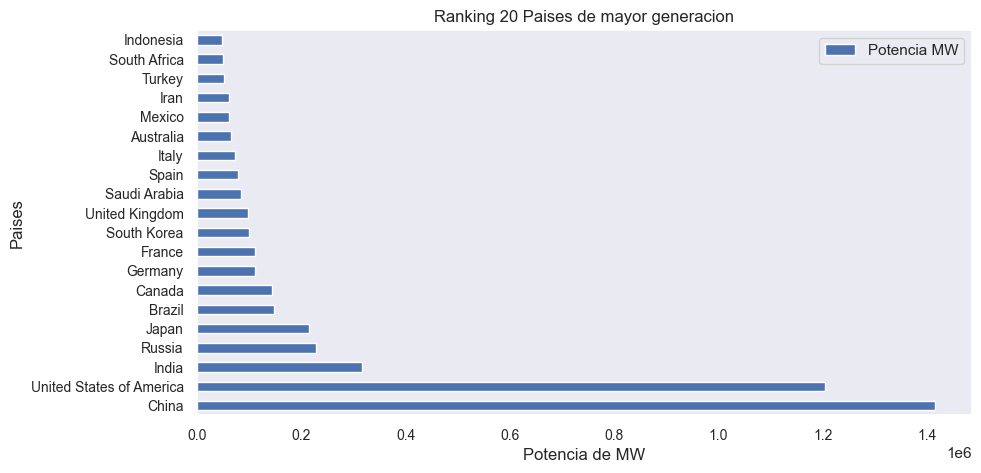

In [175]:
#Generamos grafica de barras con los datos de los 20 primeros paises que mas potencia generan
import matplotlib.pyplot as plt
%matplotlib inline

df6.plot.barh("country_long","capacity_mw",fontsize=10, grid=False, figsize=(10, 5),label='Potencia MW')
plt.ylabel("Paises")
plt.xlabel("Potencia de MW")
plt.title("Ranking 20 Paises de mayor generacion")


In [181]:
import plotly.express as px

fig = px.bar(df6, y='capacity_mw', x='country_long', text='capacity_mw', title="ranking de Producción de energia electrica mundial (millones de MW)", barmode="overlay")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_layout(barmode='overlay')
fig.show()

In [23]:
#limpiamos el dataframe y sacamos solo las 20 primeras filas objeto de mi estudio
df6=df5.loc[:19]
df6

,country_long,capacity_mw,mw_limpia,%Renovable
0,China,"1,415,067.38","364,843.88",25.78
1,United States of America,"1,204,638.05","253,116.55",21.01
2,India,"316,088.55","75,760.98",23.97
3,Russia,"228,220.05","47,128.44",20.65
4,Japan,"215,365.85","33,811.90",15.70
5,Brazil,"147,589.27","122,985.52",83.33
6,Canada,"143,578.70","97,385.30",67.83
7,Germany,"112,040.37","23,469.32",20.95
8,France,"110,615.93","34,275.93",30.99
9,South Korea,"99,472.68","6,732.66",6.77


In [185]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df6.capacity_mw,
    y=df6.country_long,
    name='MW GENERACION',
    orientation='h',
    text = df6["capacity_mw"],
    texttemplate='%{text:.3s}',
    marker=dict(
        color='rgba(69, 46, 200)',
        line=dict(color='rgba(69, 46, 200)', width=0)
    )
))
fig.add_trace(go.Bar(
    x=df6.mw_limpia,
    y=df6.country_long,
    name='MW RENOVABLES',
    orientation='h',
    textfont=dict(color="black"),
    marker=dict(
        color='rgba(36, 133, 25)',
        line=dict(color='rgba(36, 133, 25)', width=0)
    )
))

fig.update_xaxes(title="ENERGÍA ELÉCTRICA GENERADA EN MEGA WATIOS (MW)")
fig.update_yaxes(title="RANKING DE PAISES")

fig.update_layout(barmode='overlay')#,title='Produccion de Energia Renovable sobre el total')
fig.update_traces(textposition='outside')
fig.update_layout(margin=dict(l=20, r=20, t=30, b=40),paper_bgcolor='rgb(100, 247, 218)', width=1300,height=700)

fig.show()

In [25]:
#Segundo Dataset
df_2a = pd.read_csv("mole_fraction_of_carbon_dioxide_-2014.csv")
df_2a

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.45,277.45,277.45
1,1,277.14,277.14,277.14
2,2,277.16,277.16,277.16
3,3,277.16,277.16,277.16
4,4,277.16,277.16,277.16
...,...,...,...,...
2010,2010,388.72,390.78,386.65
2011,2011,390.94,393.04,388.85
2012,2012,393.02,395.04,391.00
2013,2013,395.72,397.71,393.74


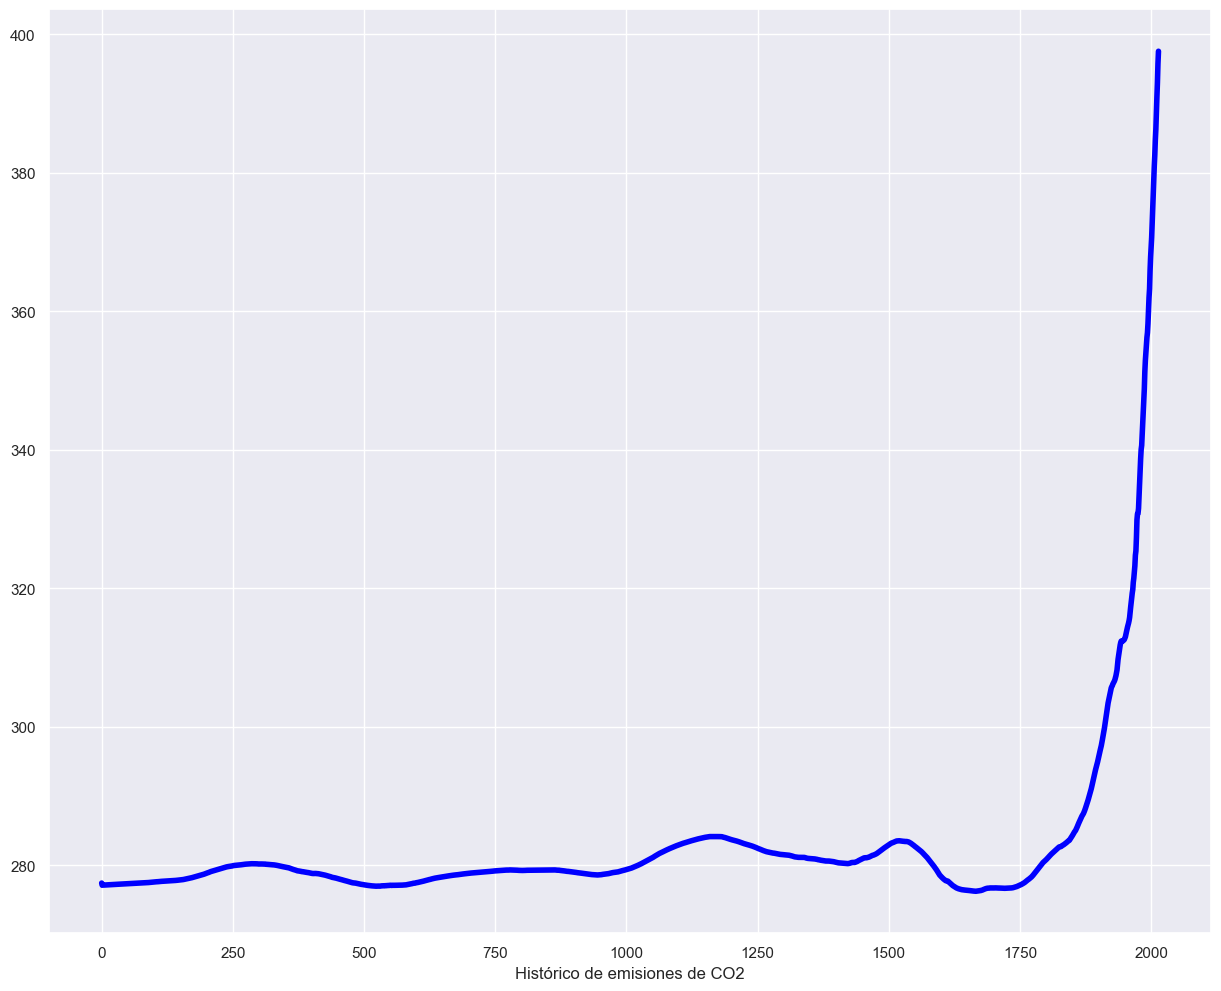

In [239]:
from matplotlib import figure

fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

plt.plot(df_2a['year'], df_2a['data_mean_global'],markerfacecolor='blue', markersize=12, color='blue', linewidth=4)
plt.xlabel("Histórico de emisiones de CO2")


fig.show()

In [26]:
#Segundo Dataset
df_3a = pd.read_csv("./Global Tree cover loss/treecover_loss_by_region__ha.csv")
df_3a

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,AFG,2001,88.09,"22,245.99"
1,AGO,2001,"101,220.62","36,963,920.63"
2,AIA,2001,3.88,626.70
3,ALA,2001,396.93,"75,902.96"
4,ALB,2001,"3,729.02","1,334,030.02"
...,...,...,...,...
4162,XKO,2021,520.12,"308,712.93"
4163,XNC,2021,2.71,753.62
4164,ZAF,2021,"52,067.38","38,510,265.05"
4165,ZMB,2021,"201,456.61","78,283,142.33"


In [27]:
#Segundo Dataset
df_3b = pd.read_csv("./Global Tree cover loss/iso_metadata.csv")
df_3b.head(10)

,name,iso
0,Afghanistan,AFG
1,Akrotiri and Dhekelia,XAD
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM
5,Andorra,AND
6,Angola,AGO
7,Anguilla,AIA
8,Antarctica,ATA
9,Antigua and Barbuda,ATG


In [29]:
# RANKING DE PAISES EN FUNCION DE SU MASA ARBOREA PERDIDA 2001-2021
#Agrupamos los 2 datasets para poder añadirle el nombre conpleto del pais a su codigo corrspondiente de pais
df_3c=pd.merge(df_3a, df_3b)
# df_3x=pd.merge(df_3c,df_4b)

#agrupamos las filas por paises, sumando las potencias de cada pais y lo ordeno de mayor a menor
df_3d=df_3c.groupby('name',group_keys=True).sum()
df_3d.drop(['umd_tree_cover_loss__year'], inplace=True, axis=1)
df_3d = df_3d.sort_values(by='umd_tree_cover_loss__ha', ascending=False)

df_3d=df_3d.reset_index()
df_3d.head(10)

,name,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,Russia,"76,008,406.22","14,165,283,931.59"
1,Brazil,"62,817,600.58","33,647,437,865.68"
2,Canada,"46,611,435.11","8,604,371,225.13"
3,United States,"44,279,415.98","17,177,629,272.48"
4,Indonesia,"28,562,386.82","19,556,043,524.91"
5,Democratic Republic of the Congo,"17,145,176.21","10,535,878,135.09"
6,China,"10,875,223.29","4,626,201,464.82"
7,Australia,"8,727,950.16","2,342,022,587.76"
8,Malaysia,"8,669,490.89","4,972,405,676.13"
9,Bolivia,"6,672,732.69","3,003,224,516.86"


In [186]:
df_3e = df_3d.sort_values(by='gfw_gross_emissions_co2e_all_gases__Mg', ascending=False)
df_3e=df_3e.iloc[:4]
df_3e.drop(['umd_tree_cover_loss__ha'], inplace=True, axis=1)
# df_3e.drop(['iso'], inplace=True, axis=1)
# list=['Brazil','Indonesia','United States','Russia']
# list=['Brazil']
seleccion1=df_3c[df_3c.name=='Brazil']
seleccion2=df_3c[df_3c.name=='Russia']
seleccion3=df_3c[df_3c.name=='Indonesia']
seleccion4=df_3c[df_3c.name=='United States']
df_3e


,name,gfw_gross_emissions_co2e_all_gases__Mg
1,Brazil,"33,647,437,865.68"
4,Indonesia,"19,556,043,524.91"
3,United States,"17,177,629,272.48"
0,Russia,"14,165,283,931.59"


In [134]:
df_6e

,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
umd_tree_cover_loss__year,,
2001,"13,353,470.98","4,675,979,303.48"
2002,"16,451,699.13","5,548,247,381.46"
2003,"14,474,225.19","4,729,094,912.00"
2004,"19,906,841.41","7,112,687,798.84"
2005,"18,096,758.71","6,925,547,296.93"
2006,"17,647,644.49","6,734,466,901.38"
2007,"18,386,094.26","7,205,695,319.68"
2008,"18,608,818.64","7,147,232,590.92"
2009,"16,983,539.11","7,226,128,492.98"


In [150]:
df_3d

,name,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,Russia,"76,008,406.22","14,165,283,931.59"
1,Brazil,"62,817,600.58","33,647,437,865.68"
2,Canada,"46,611,435.11","8,604,371,225.13"
3,United States,"44,279,415.98","17,177,629,272.48"
4,Indonesia,"28,562,386.82","19,556,043,524.91"
...,...,...,...
207,Eritrea,2.53,"1,067.79"
208,Saint-Barthélemy,1.54,467.35
209,Niger,1.28,190.28
210,Gibraltar,0.37,79.75


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


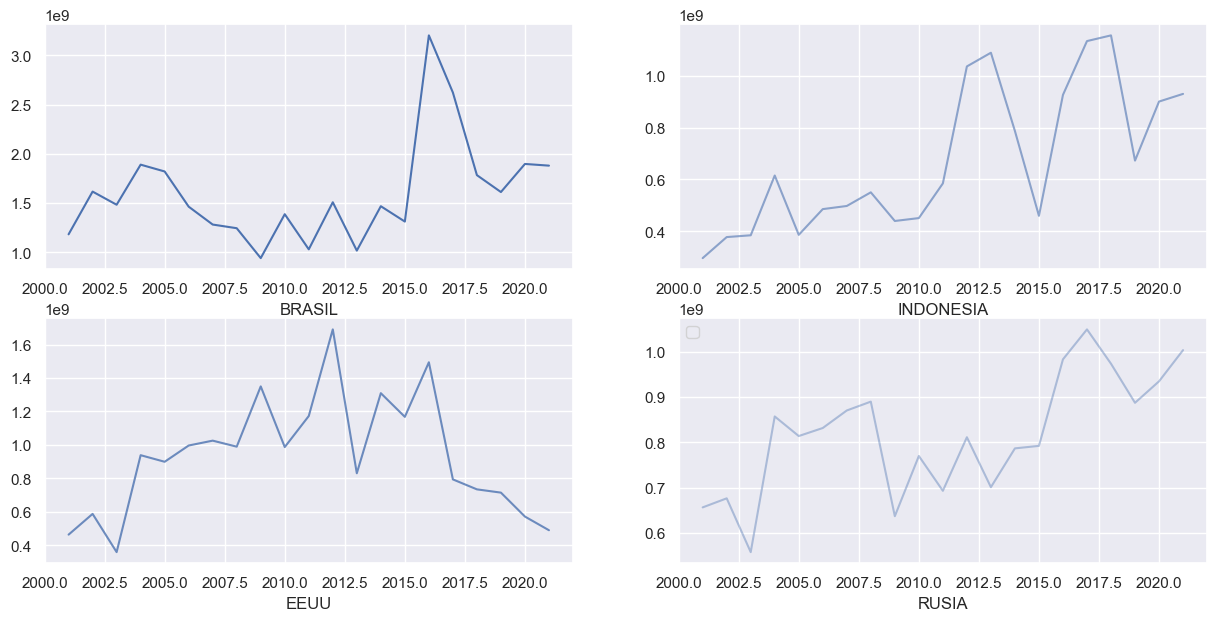

In [169]:
fig = plt.figure()

fig.set_size_inches(15, 7)
# Adds subplot on position 1
y1 = fig.add_subplot(221)
y2= fig.add_subplot(222)
y3= fig.add_subplot(223)
y4= fig.add_subplot(224)



x=seleccion1.umd_tree_cover_loss__year
y11=seleccion1.gfw_gross_emissions_co2e_all_gases__Mg
y22=seleccion2.gfw_gross_emissions_co2e_all_gases__Mg
y33=seleccion3.gfw_gross_emissions_co2e_all_gases__Mg
y44=seleccion4.gfw_gross_emissions_co2e_all_gases__Mg
# media=df_3d.mean(gmeafw_gross_emissions_co2e_all_gases__Mg)

# Basic stacked area chart.
y1.plot(x,y11,alpha=1)
y2.plot(x,y22, alpha=0.6)
y3.plot(x,y33,alpha=0.8)
y4.plot(x,y44, alpha=0.4)

y1.set_xlabel('BRASIL')
y2.set_xlabel('INDONESIA')
y3.set_xlabel('EEUU')
y4.set_xlabel('RUSIA')

plt.legend(loc='upper left')

plt.show()


In [33]:
#Segundo Dataset ganancia arborea por paises en 2001-2021
df_4a = pd.read_csv("./Global tree cover gain/treecover_gain_2000-2020_by_region__ha.csv")
df_4b=pd.merge(df_3b,df_4a)
df_4b.drop(['iso'], inplace=True, axis=1)
df_4b.drop(['umd_tree_cover_extent_2000__ha'], inplace=True, axis=1)
df_4b = df_4b.sort_values(by='umd_tree_cover_gain__ha', ascending=False)
df_4b=df_4b.reset_index()
df_4b.drop(['index'], inplace=True, axis=1)
df_4b.head(20)

,name,umd_tree_cover_gain__ha
0,Russia,"37,220,539.18"
1,Canada,"16,961,758.32"
2,United States,"13,986,699.79"
3,Brazil,"8,062,335.57"
4,China,"6,689,625.94"
5,Indonesia,"4,882,137.56"
6,India,"1,881,688.64"
7,Thailand,"1,842,370.58"
8,Sweden,"1,671,285.36"
9,Australia,"1,600,600.19"


In [132]:
#perdida de masa arborea por año
df_6e=df_3c.groupby('umd_tree_cover_loss__year').sum('umd_tree_cover_loss__ha')
df_6e.head(25)

,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
umd_tree_cover_loss__year,,
2001,"13,353,470.98","4,675,979,303.48"
2002,"16,451,699.13","5,548,247,381.46"
2003,"14,474,225.19","4,729,094,912.00"
2004,"19,906,841.41","7,112,687,798.84"
2005,"18,096,758.71","6,925,547,296.93"
2006,"17,647,644.49","6,734,466,901.38"
2007,"18,386,094.26","7,205,695,319.68"
2008,"18,608,818.64","7,147,232,590.92"
2009,"16,983,539.11","7,226,128,492.98"


In [35]:
df_5=pd.merge(df_4b,df_3d)
df_5=df_5.loc[:19]
df_5['gfw_gross_emissions_co2e_all_gases__Mg']=df_5['gfw_gross_emissions_co2e_all_gases__Mg']/1000
df_6=df_5.copy()
df_6

,name,umd_tree_cover_gain__ha,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,Russia,"37,220,539.18","76,008,406.22","14,165,283.93"
1,Canada,"16,961,758.32","46,611,435.11","8,604,371.23"
2,United States,"13,986,699.79","44,279,415.98","17,177,629.27"
3,Brazil,"8,062,335.57","62,817,600.58","33,647,437.87"
4,China,"6,689,625.94","10,875,223.29","4,626,201.46"
5,Indonesia,"4,882,137.56","28,562,386.82","19,556,043.52"
6,India,"1,881,688.64","2,066,015.30","1,010,262.42"
7,Thailand,"1,842,370.58","2,297,702.71","1,267,686.25"
8,Sweden,"1,671,285.36","5,167,696.86","1,261,465.92"
9,Australia,"1,600,600.19","8,727,950.16","2,342,022.59"


In [240]:
import chart_studio.plotly as py
import plotly.graph_objects as go


trace_loss = go.Bar(x=df_5.name,
                  y=df_5.umd_tree_cover_loss__ha,
                  name='Perdida',
                  marker=dict(color='#242823'))

trace_gain = go.Bar(x=df_5.name,
                y=df_5.umd_tree_cover_gain__ha,
                name='Ganancia',
                marker=dict(color='#248519'))

# trace_CO2 = go.Bar(x=df_5.name,
#                 y=df_5.gfw_gross_emissions_co2e_all_gases__Mg,
#                 name='CO2',
#                 marker=dict(color='#59606D'))

data = [trace_loss, trace_gain]

layout = go.Layout(title="PÉRDIDA / GANANCIA GLOBAL DE LA CUBIERTA ARBÓREA DEL PLANETA EN EL PERIODO 2001-2021",
                xaxis=dict(title='Paises'),
                yaxis=dict(title='Hectareas (en millones)'))

fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=1200,height=800)
iplot(fig,filename='jupyter-styled_bar')

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')


In [ ]:
fig, ax = plt.subplots(2, 3)
ax[1, 1].plot(x, np.sin(x))
print(ax)
for axx in ax.reshape(-1):
    # print(axx)
    axx.set_ylabel("Hola")
    axx.set_title("Matrix")
    axx.set_xlabel("x label")

fig.tight_layout()

In [109]:
df_3e

,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
umd_tree_cover_loss__year,,
2001,"13,353,470.98","4,675,979,303.48"
2002,"16,451,699.13","5,548,247,381.46"
2003,"14,474,225.19","4,729,094,912.00"
2004,"19,906,841.41","7,112,687,798.84"
2005,"18,096,758.71","6,925,547,296.93"
2006,"17,647,644.49","6,734,466,901.38"
2007,"18,386,094.26","7,205,695,319.68"
2008,"18,608,818.64","7,147,232,590.92"
2009,"16,983,539.11","7,226,128,492.98"


In [49]:
seleccion1

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,name
508,BRA,2001,"2,746,361.56","1,182,558,365.31",Brazil
509,BRA,2002,"3,507,049.44","1,616,647,815.92",Brazil
510,BRA,2003,"3,248,526.73","1,483,181,868.32",Brazil
511,BRA,2004,"3,848,770.79","1,890,358,742.87",Brazil
512,BRA,2005,"3,486,562.71","1,821,021,696.04",Brazil
513,BRA,2006,"2,876,804.75","1,463,579,652.78",Brazil
514,BRA,2007,"2,621,820.18","1,281,855,515.47",Brazil
515,BRA,2008,"2,444,308.04","1,244,706,808.84",Brazil
516,BRA,2009,"1,817,901.23","940,965,886.23",Brazil
517,BRA,2010,"2,688,896.18","1,386,980,184.95",Brazil


In [ ]:
df_6

,name,umd_tree_cover_gain__ha,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,Russia,"37,220,539.18","76,008,406.22","14,165,283.93"
1,Canada,"16,961,758.32","46,611,435.11","8,604,371.23"
2,United States,"13,986,699.79","44,279,415.98","17,177,629.27"
3,Brazil,"8,062,335.57","62,817,600.58","33,647,437.87"
4,China,"6,689,625.94","10,875,223.29","4,626,201.46"
5,Indonesia,"4,882,137.56","28,562,386.82","19,556,043.52"
6,India,"1,881,688.64","2,066,015.30","1,010,262.42"
7,Thailand,"1,842,370.58","2,297,702.71","1,267,686.25"
8,Sweden,"1,671,285.36","5,167,696.86","1,261,465.92"
9,Australia,"1,600,600.19","8,727,950.16","2,342,022.59"


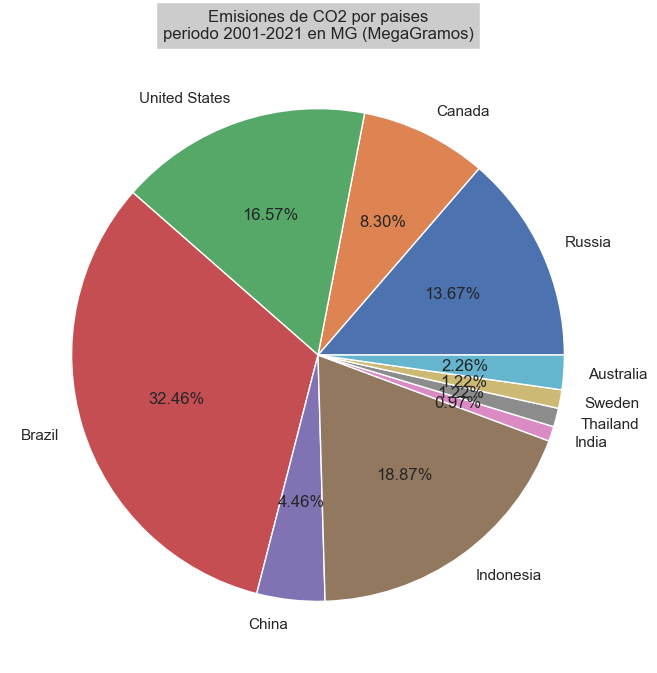

In [295]:
df_7=df_6.copy()
df_7=df_7.loc[:9]
df_7=df_7.set_index('name')
plt.figure(figsize=(10,8))
plt.pie(df_7.gfw_gross_emissions_co2e_all_gases__Mg,
        labels=df_7.index,
        autopct='%1.2f%%')
plt.title("Emisiones de CO2 por paises\n" + "periodo 2001-2021 en MG (MegaGramos)", bbox={'facecolor':'0.8', 'pad':5})


p=plt.gcf();

In [242]:
df_7=df_6.sort_values(by='gfw_gross_emissions_co2e_all_gases__Mg', ascending=False)
df_7

,name,umd_tree_cover_gain__ha,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
3,Brazil,"8,062,335.57","62,817,600.58","33,647,437.87"
5,Indonesia,"4,882,137.56","28,562,386.82","19,556,043.52"
2,United States,"13,986,699.79","44,279,415.98","17,177,629.27"
0,Russia,"37,220,539.18","76,008,406.22","14,165,283.93"
10,Democratic Republic of the Congo,"1,591,178.54","17,145,176.21","10,535,878.14"
1,Canada,"16,961,758.32","46,611,435.11","8,604,371.23"
17,Malaysia,"1,004,944.63","8,669,490.89","4,972,405.68"
4,China,"6,689,625.94","10,875,223.29","4,626,201.46"
15,Colombia,"1,085,199.37","4,928,410.93","2,749,508.26"
9,Australia,"1,600,600.19","8,727,950.16","2,342,022.59"


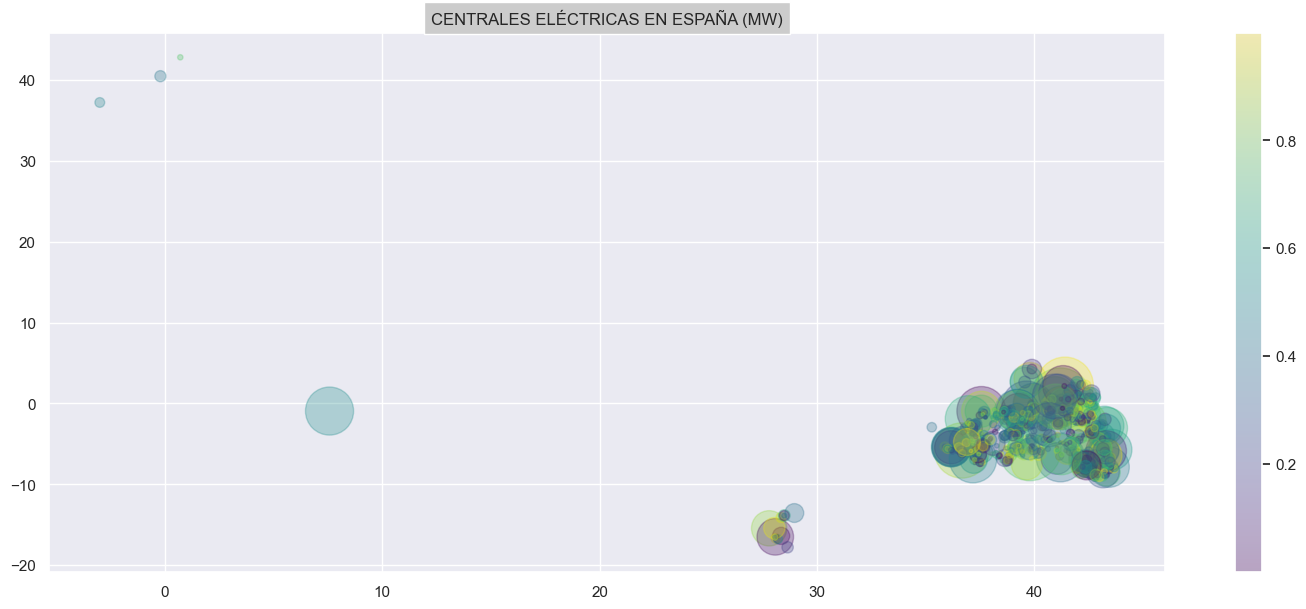

In [297]:
#grafico con el scatter de las centrales de españa en partidular
fig = plt.figure()
rng = np.random.RandomState(0)
x = df11['latitude']
y = df11['longitude']
colors = rng.rand(829)
sizes = df11['capacity_mw']

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale
plt.title("CENTRALES ELÉCTRICAS EN ESPAÑA (MW)", bbox={'facecolor':'0.8', 'pad':5})
# plt.xlabel("Histórico de emisiones de CO2")
fig.set_size_inches(18, 7)


In [284]:
#creamos el dtaframe con los datos de españa en particular
df11=df1.loc[df1['country_long']=='Spain']
df11.drop(['origen'], inplace=True, axis=1)
df11.drop(['mw_limpia'], inplace=True, axis=1)
df11.drop(['%Renovable'], inplace=True, axis=1)
print(df11)

      country_long            name  capacity_mw  latitude  longitude  \
20135        Spain         ABONO 2       877.66     43.55      -5.72   
20136        Spain  ACECA  GRUPO 4       758.74     39.94      -3.85   
20137        Spain    ADS JUNEDA 2        15.00     41.55       0.82   
20138        Spain          AGREDA        18.00     41.86      -1.92   
20139        Spain          AGREDA        16.33     41.86      -1.92   
...            ...             ...          ...       ...        ...   
20959        Spain         Zaratán         9.00     41.64      -4.82   
20960        Spain           Zarza         7.60     39.87      -6.83   
20961        Spain         Zuera I         9.00     41.93      -0.81   
20962        Spain        Zuera II         9.90     41.94      -0.82   
20963        Spain           Zújar         7.00     38.94      -5.88   

      primary_fuel  
20135         Coal  
20136          Gas  
20137        Waste  
20138         Wind  
20139        Waste  
...      

In [287]:

#cargamos el mapa de mundo con los marcadores en las coordenadas de la tabla (latitud y longitud)
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
import pandas as pd
from vega_datasets import data as vds

from branca.element import Figure

# multiple markers using dataframe
# there is an example below using apply function instead of loop

# create map
map_centrals = folium.Map(location=[40, -5], zoom_start=4)

# plot airport locations
for (index, row) in df11.iterrows():
    folium.Marker(location=[row.loc['latitude'], row.loc['longitude']], 
                  popup=row.loc['name']+ ' ' + row.loc['primary_fuel'], 
                  tooltip='click').add_to(map_centrals)
    
# display map 
map_centrals

In [320]:
import plotly.express as px
import pandas as pd


df11.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df11, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="name", 
                        hover_data=["name", "capacity_mw"],
                        color="capacity_mw",
                        color_continuous_scale=color_scale,
                        size="capacity_mw",
                        zoom=8, 
                        height=800,
                        width=1300)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()